<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220521_train_val_dropout_callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

# 1. fashin_mnist.load_data() : 데이터 다운로드(mnist_test.csv) → train/test 데이터셋(input/target) 분류 까지 한번에
 - train 데이터셋 : (60000, 28, 28)
 - test 데이터셋 : (10000, 28, 28)


In [13]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [14]:
train_input.shape

(60000, 28, 28)

In [15]:
test_input.shape

(10000, 28, 28)

In [16]:
train_scaled = train_input / 255.0

# 2. train 데이터셋 → train / val(검증) 데이터셋으로 다시 나눔
 - train 데이터셋 : (48000, 28, 28)
 - val 데이터셋 : (12000, 28, 28)

In [17]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [18]:
train_scaled.shape

(48000, 28, 28)

# 3. 인공신경망 모델 만들기 : 함수 활용

In [19]:
def model_fn(a_layer=None):
  model = keras.Sequential() # 1.모델 생성(입력/밀집/출력층 등 생성 전)
  model.add(keras.layers.Flatten(input_shape=(28, 28))) # 2.Flatten층 추가
  model.add(keras.layers.Dense(100, activation='relu')) # 3.밀집층 추가
  if a_layer: # 함수 호출시 a_layer를 정의 했다면:
    model.add(a_layer) # 밀집층 추가
  model.add(keras.layers.Dense(10, activation='softmax')) # 4.출력층 추가
  return model # 인스턴스 객체 반환(Sequential 클래스로 인스턴스 객체 생성)

In [20]:
# model_fn().summary() # model.summary()와 같음

# 반환되는 객체를 변수에 담아서 사용하는 방법
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy') # 원-핫 인코딩 하지않은 타깃 사용시 sparse(희소) 손실함수 사용
history = model.fit(train_scaled, train_target, epochs=5, verbose=1) # verbose=0 : 에포크마다 진행막대/손실 등의 지표 생략
# fit() 의 실행결과 → History 클래스 객체를 반환 <tensorflow.python.keras.callbacks.History at 0x7fe38bfc080> 

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5363 - accuracy: 0.8116
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3962 - accuracy: 0.8568
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3577 - accuracy: 0.8702
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8793
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3221 - accuracy: 0.8841


# History 클래스가 갖고 있는 변수와 함수/클래스를 확인해보자 : dir()

In [22]:
dir(history.history) # keys 함수를 사용할 수 있네(= 딕셔너리 형태라는 뜻)
# compile() 메서드의 metrics 매개변수에 'accuracy'를 추가했기 대문에 history 속성에 포함되어 있음

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [23]:
type(history.history)

dict

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [25]:
history.history['loss'] # 각 epoch마다의 손실값이 들어있음

[0.5363357663154602,
 0.3961579501628876,
 0.3577246069908142,
 0.3363279104232788,
 0.32210850715637207]

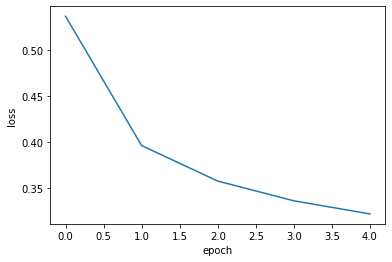

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss']) # 리스트를 plot 할 때 인덱스가 x축 → 0부터 시작
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

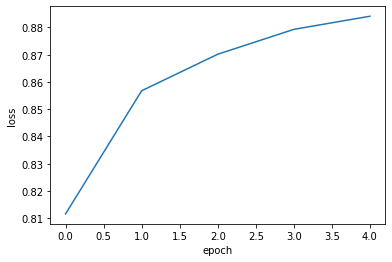

In [27]:
plt.plot(history.history['accuracy']) # 리스트를 plot 할 때 인덱스가 x축 → 0부터 시작
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

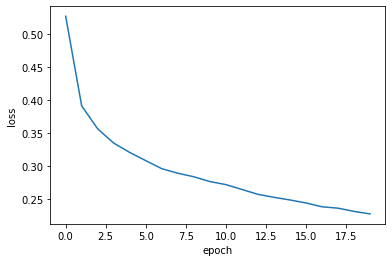

In [28]:
# epoch를 늘려서 훈련해보자(5 → 10회)
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 에포크에 대한 과대/과소적합 파악 : 훈련세트의 손실과 검증세트 손실 비교
 - 인공 신경망 모델에서 최적화 하는 대상은 정확도가 아닌 "손실 함수"
 - 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 있음

In [29]:
# 에포크마다 훈련세트의 손실과 정확도를 확인 할 수 있었다.
# 모델 훈련시 검증세트도 validation_data 매개변수에 넣어 활용 할 수 있다.

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [30]:
history.history.keys() # 모델 훈련시 검증세트도 매개변수에 넣어 전달했더니 : 'val_loss', 'val_accuracy' 추가 됨

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

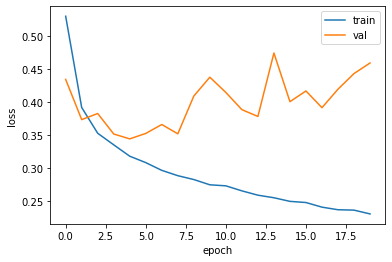

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

훈련 손실은 꾸준히 감소 → 전형적인 과대적합 모델이 만들어짐

검증 손실이 상승하는 시점을 가능한 뒤로 늦추면 → 검증세트에 대한 손실이 감소 + 검증세트에 대한 정확도 증가

# 과대 적합을 막기 위한 신경망에 특화된 규제 방법
 - 하이퍼파라미터 중 **옵티마이저를 변경**하여 과대적합 완화 : RMSprop(defalut) → Adam(대중적)
 - **+ 옵티마이저 학습률 조절**
 - 드롭아웃 : 훈련과정에서 일부 뉴런을 꺼서(출력을 0으로 만들어) 특정 뉴런에 과대하게 의존하는 것을 줄여 안정적인 예측가능
 - **+ 드롭아웃할 뉴런 개수 조절**

## Dropout() 클래스
- 층처럼 사용되지만 훈련되는 파라미터는 없음
- 드롭아웃은 모델 만들때 층으로 넣는다.
- 훈련시에만 적용되고, 평가/예측시 적용되지 않는다 : 케라스가 자동으로 해줌

In [32]:
# Dropout 클래스로 드롭아웃 층 추가
# 층처럼 사용되지만 훈련되는 파라미터는 없음

model = model_fn(keras.layers.Dropout(0.3)) # 앞의 층의 출력을 30%만 랜덤하게 0으로 만듬
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


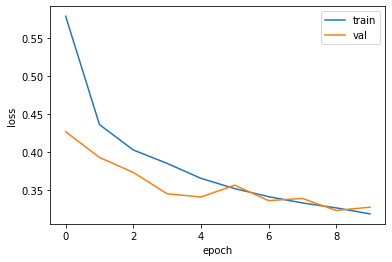

In [33]:
# 모델에 드롭아웃 층을 추가 → 학습
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

검증세트의 손실이 작고 에포크 증가에도 큰 증가 없음

**epochs를 늘려서 검증세트의 손실이 올라간 상황에서 모델/파라미터를 저장했더니 정확도가 낮게 나옴 → epochs를 조절하여 최적의 상태로 저장해야함**

# 모델 저장과 복원
 - 파라미터 저장 : save_weights() 메서드
 - 모델구조+파라미터 저장 : save() 메서드
 - 저장시 확장자가 '.h5'


 - 파라미터 복원 : load_wights() 메서드
 - 파라미터를 복원하여 사용하기 위해서는 모델구조가 동일해야 함

In [34]:
# 파라미터 저장
model.save_weights('model-weights.h5')
# 모델 구조 + 파라미터 저장
model.save('model-whole.h5')

## 복원하여 검증
 - 1. 모델생성(훈련X) + 저장된 파라미터 불러오기
 -  → 검증 : predict() 
 
 - 2. 저장된 모델구조(훈련O) 불러오기
 -  → 검증 : evaluate(), 이미 fit()/compile() 되었기 때문에 사용 가능

In [35]:
# 1. 훈련하지 않은 새로운 모델 + 저장된 파라미터를 복원
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5') # 생성된 모델에 파라미터를 붙이는방식

In [36]:
# 2. 모델의 검증 정확도 확인 : predict()
## evaluate()를 하려면 predict() → compile()을 진행한 후 → evaluate() 해야함
# 사이킷런과 달리 샘플마다 10개의 클래스에 대한 확률 반환(다중 분류이기 때문)
import numpy as np
model.predict(val_scaled).shape # (12000, 10)
val_labels = np.argmax(model.predict(val_scaled), axis=1) # armax(array, axis=1) : 배열의 특정 축을 기준으로 가장 큰값을 갖는 인덱스를 찾는 메서드
val_labels # array([1, 8, 8, ..., 8, 1, 8])
np.mean(val_labels == val_target)

0.8795

In [37]:
# 3. 모델 전체를 파일에서 읽은 다음 검증세트의 정확도 확인 : evaluate()
model = keras.models.load_model('model-whole.h5') # keras에서 모델전체를 읽어오는 방식
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3277 - accuracy: 0.8795


[0.32770252227783203, 0.8794999718666077]

# 콜백

사용 이유

1. 20번의 에포크 동안 모델을 훈련하며 검증세트의 손실함수가 감소→증가하는 지점을 확인함
2. 손실함수가 증가하거나/모델이 과대적합 되지 않는 에포크만큼 낮추어 다시 훈련해야 했음
3. 이처럼 모델을 두번씩 훈련하지 않고 한번에 끝낼 수 있음

특징

 - 훈련 과정 중간에 특정 작업을 수행할 수 있게 하는 객체
 - keras.callbacks 패키지 아래에 있는 클래스들
 - fit() 메서드의 callbacks 매개변수에 리스트로 전달
 - ModelCheckpoint() 콜백 클래스는 에포크마다 모델을 저장
 

In [38]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [39]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8865


[0.3175104558467865, 0.8865000009536743]

## ModelCheckpoint 콜백이 가장 낮은 점수의 모델을 자동으로 저장해줌

문제점
 - 검증세트의 손실함수가 상승하기 시작하면 그 이후에는 과대적합이 더 커짐
 - 더이상 훈련을 계속할 필요가 없으나 정해진 에포크 만큼 훈련이 계속됨
 - 컴퓨터 자원과 시간의 낭비

대책
 - 조기종료 : 에포크 횟수를 제한(=과대적합을 방지)
 - 조기종료를 위한 콜백 : **EarlyStopping 콜백**

## EarlyStopping 콜백
 - patience 매개변수 : 검증세트의 손실이 커지지 않더라도 참을 에포크 횟수
 - restore_best_weights 매개변수 : True로 지정하면 가장 낮은 검증 손실을 낸 모델 파라미터로 되돌림
 - EarlyStopping + ModelCheckpoint 콜백을 함께사용
 >가장 낮은 검증 손실 모델을 저장(ModelCheckpoint콜백의 기능)

 >검증 손실이 다시 상승할때 훈련 중지(EarlyStopping 콜백의 기능)

 >훈련 중지 후 현재 모델의 파라미터를 최상의 파라미터로 갱신(EarlyStopping 콜백의 기능)

In [40]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics='accuracy')
# 가장 낮은 검증 손실의 모델을 파일에 저장
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5',
                                                save_best_only=True)
# 검증 손실이 다시 상승할떄(2번 연속 상승시 까지 참고) 중지, 가장 낮은 검증 손실시의 파라미터로 갱신
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb, early_stopping_cb])

In [44]:
# 몇 번째 에포크에서 훈련이 중지 되었나
early_stopping_cb.stopped_epoch # stopped_epoch 속성
# 에포크 횟수는 0부터 시작하므로 6은 7번째 에포크에서 훈련이 중지되었음을 의미
# patiencs를 2로 지정했으므로 최상의 모델은 5번째 에포크일 것

6

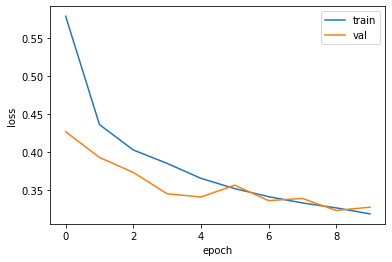

In [43]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [46]:
# 조기 종료로 얻은 모델을 사용해 검증 세트에 대한 성능 확인
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3427 - accuracy: 0.8747


[0.34268712997436523, 0.874666690826416]